In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import missingno as mano
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime, timedelta
from sklearn import preprocessing
import pyodbc
from scipy.stats import normaltest, shapiro, chisquare, kstest

In [45]:
# F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

def load_data(name,typee):
    if typee=='excel':
        df=pd.read_excel(name)
        return df
    elif typee=='csv':
        df=pd.read_csv(name)
        return df
    elif typee=='sql':
        #query=input('Enter sql query: ')
        conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-FI4K9P1;'
                      'Database=IBA_23387;'
                      'Trusted_Connection=yes;')
        cursor = conn.cursor()
        df = pd.read_sql_query(name,conn)
        return df
x=load_data('Sales.xls','excel')
x

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09


In [37]:
# F2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)

def df_details(df, n):
    x='0'
    print('Shape: ',df.shape)
    print('Column types: ')
    print(df.dtypes)
    while (x!='H' and x!='T'):
        x=input('H/T?')
    if x=='H':
        return df.head(n)
    elif x=='T':
        return df.tail(n)
df_details(x, 10)

Shape:  (84548, 22)
Column types: 
Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object
H/T?t
H/T?h
H/T?H


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,,C4,NaN,...,20,0,20,2581,9730,1900,2,C4,-,later
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,,C4,NaN,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18,,C7,NaN,...,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34,,D5,NaN,...,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,,D9,NaN,...,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


In [45]:
# F3: remove unnecessary/useless columns (based on results of F2 and your background knowledge and the problem to be solved), e.g., identifiers, multiple primary keys, extra KPI like GMROI in sales which is the same for the whole year etc.

def remove_columns(df, names): # removes columns mentioned in names from df
    for i in names:
        df=df.drop([i], axis=1)
    return df
remove_columns(x,['BOROUGH','NEIGHBORHOOD'])

,Unnamed: 0,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,NaN,10009.0,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,,NaN,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,,NaN,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,,NaN,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,,NaN,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,,10309.0,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,,10309.0,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,,10309.0,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,,10309.0,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [55]:
# F4: remove rows containing a particular value of a given column, e.g., in smoking_status column, I don't want to consider non-smokers in my ML problem so I remove all these rows.

def remove_rows(df, column, names): # removes values from a df column which occur in names
    for i in names:
        df=df.loc[df[column] != i,:]
    return df
remove_rows(x, 'SALE DATE', ['not sure','why ','later'])

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,,C4,NaN,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [141]:
# F5: determine the missing values in the whole dataset

def missing_count(df):
    a=pd.DataFrame()
    a['Missing percentage']=(df.isna().sum()/df.shape[0])*100
    a['Missing sum']=df.isna().sum()
    return a

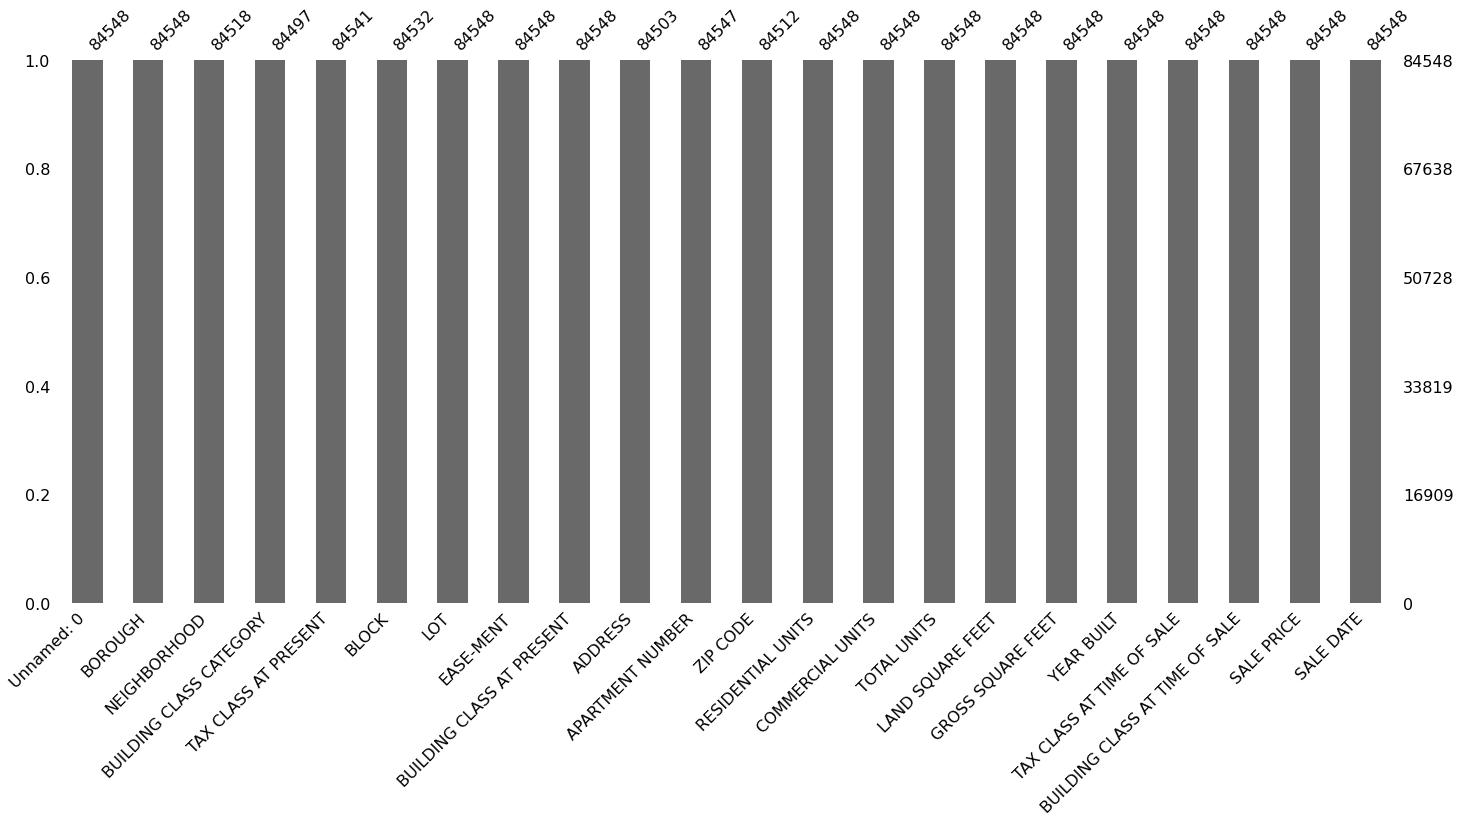

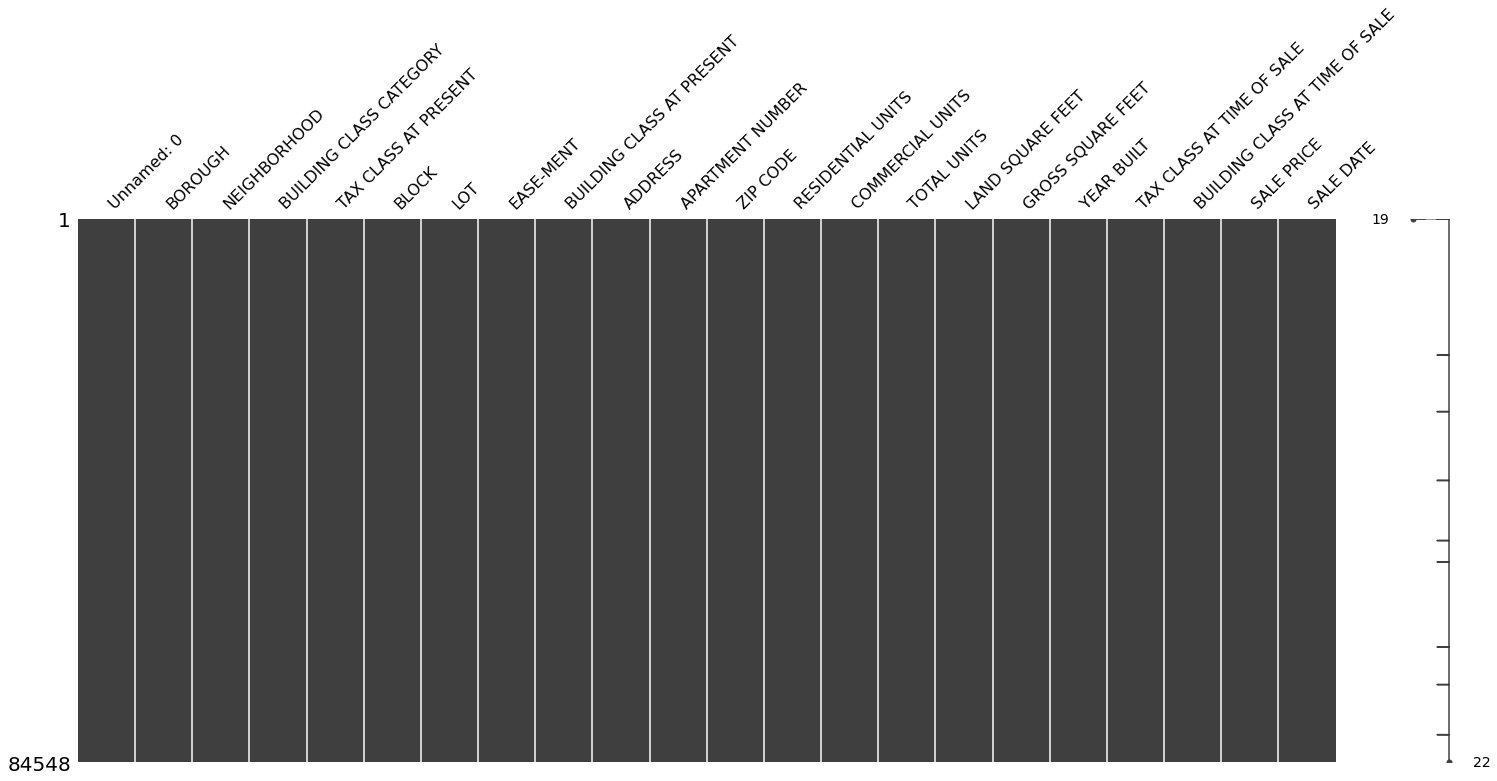

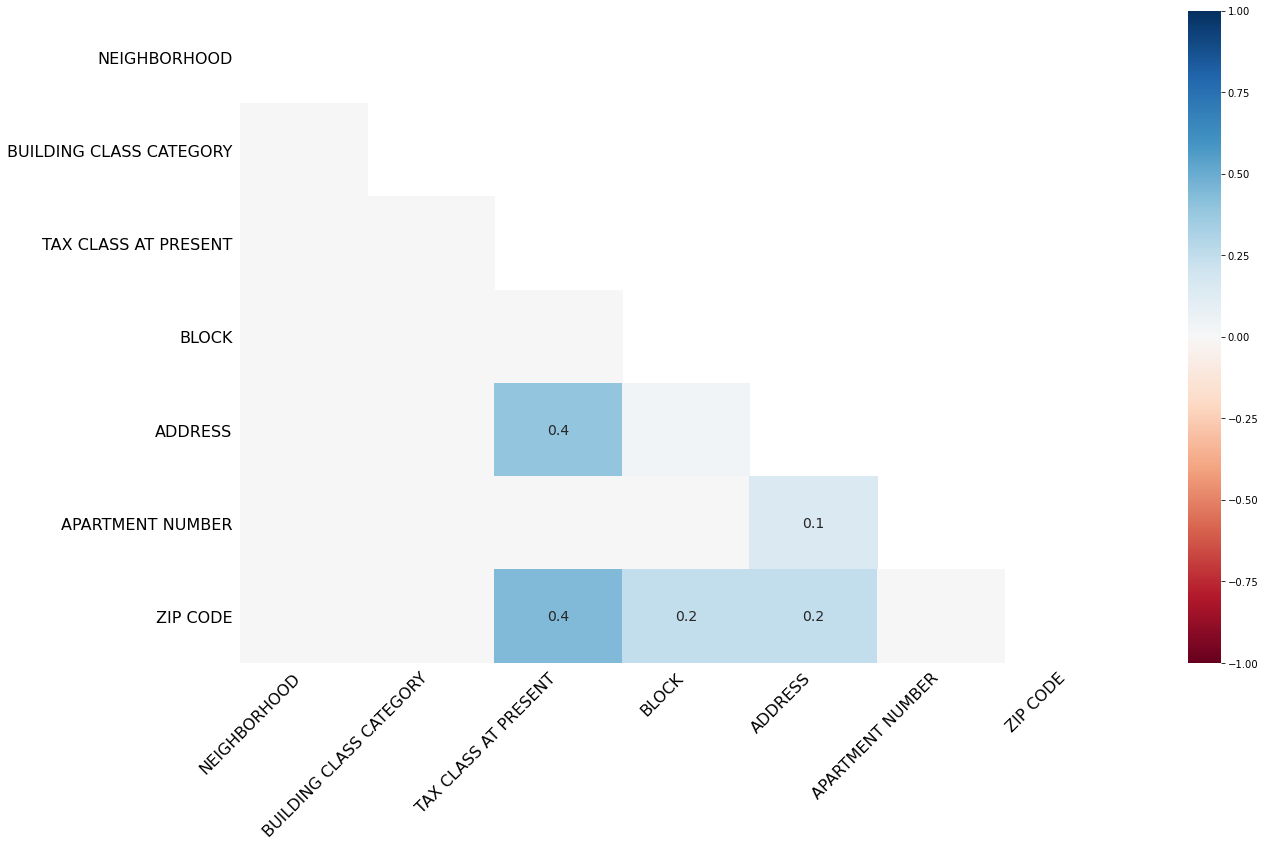

In [74]:
# F6: analyze missing values of one or more columns using mano module

def mano_analysis(*args):
    if len(args)==1:   # if only one argummet is passed, it shows tha mano analysis of all the columns in the dataframe
        df=args[0]
        mano.bar(df)
        mano.matrix(df)
        mano.heatmap(df)
    elif len(args)==2:   # if 2 arguments are passed which includes df as first argumemnt and list of columns as another,
        df=args[0]       # then mano analysis of selected columns are shown
        names=args[1]
        df=df.loc[:,args[1]]
        mano.bar(df)
        mano.matrix(df)
        mano.heatmap(df)
mano_analysis(x,['SALE PRICE','SALE DATE'])

In [128]:
df=load_data('sales_test.csv','csv')
df

C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


How many columns do you want to impute? 3
Enter column: GROSS SQUARE FEET
Enter column: SALE PRICE
Enter number of neighbors: 3
knn plot column x: LAND SQUARE FEET
knn plot column y: GROSS SQUARE FEET


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


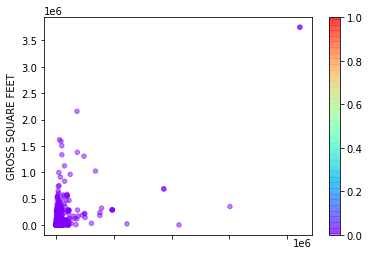

In [152]:
# F7: cater for missing values (input the column with missing value, and the method through which you want to cater for the missing values)

def fill_mv(df,column,method):
    if method=='mean':
        df[column]=df[column].fillna(df[column].mean(),inplace=True)
    elif method=='median':
        df[column]=df[column].fillna(df[column].median(),inplace=True)
    elif method=='mode':
        df[column]=df[column].fillna(df[column].mode(),inplace=True)
    elif method=='value':
        x=input('Enter value: ')
        df[column]=df[column].fillna(x,inplace=True)
        
    elif method=='linear interpolatiom':
        x=input('forward or backward interpolation? ')
        if x=='forward':
            df[column] = df[column].interpolate(method ='linear', limit_direction ='forward')
        elif x=='backward':
            df[column] = df[column].interpolate(method ='linear', limit_direction ='backward')
            
    elif method=='KNN' or method=='knn':
        from sklearn.impute import KNNImputer
        c=int(input('How many columns do you want to impute? '))
        for i in range(c-1):
            y=[column]
            x=input('Enter column: ')
            y.append(x)
            
            
            
        n=int(input('Enter number of neighbors: '))
        imputer = KNNImputer(n_neighbors=n)
        df1=df.copy(deep=True)
        df1[y] = imputer.fit_transform(df1[y])
        
        
        a=input('knn plot column x: ')
        b=input('knn plot column y: ')
        
        nulls=df[a].isna() + df[b].isna()
        
        df1.plot(x=a,y=b,kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')
        df=df1.copy(deep=True)
#strip(df, 'SALE PRICE')
#discretize(df,'GROSS SQUARE FEET','-',np.nan)
#to_numeric(df,['GROSS SQUARE FEET'])
fill_mv(df,'LAND SQUARE FEET','knn')

count     8399.000000
mean      1775.878179
std       3585.050525
min          2.240000
25%        143.195000
50%        449.420000
75%       1709.320000
max      89061.050000
Name: Sales, dtype: float64

According to skew and kurtosis test: 
Skew =  5.386020250490863
Kurtosis =  60.8913966878763
stat=  9206.986787603542
p=  0.0
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.4984586834907532
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  60778959.473332964
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  0.9993180002233694
p=  0.0
Probably not Normal


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


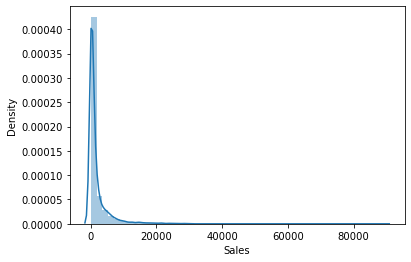

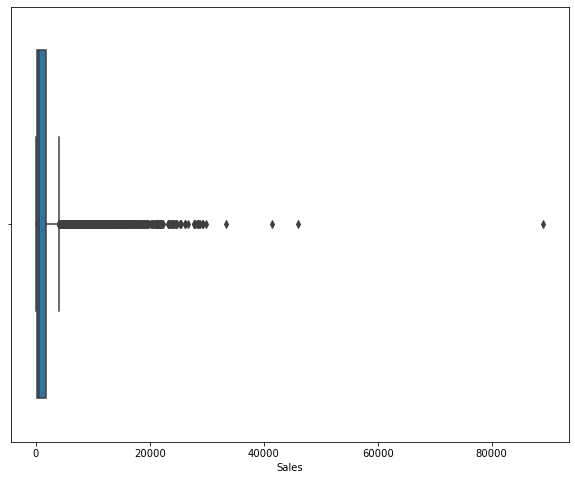

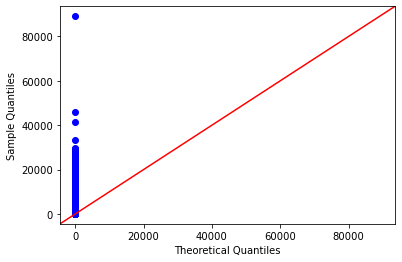

In [58]:
# F8: Function for numerical data analysis - includes histogram, boxplot, qqplot, describe, and statistical tests for normality

def numerical_analysis(df,x):
    print(df[x].describe())
    print('')
    
    print('According to skew and kurtosis test: ')
    Skew=skew(df[x])
    Kurtosis=kurtosis(df[x])
    print('Skew = ',Skew)
    print('Kurtosis = ',Kurtosis)
    stat, p=normaltest(df[x])
    print('stat= ',stat)
    print('p= ',p)
    if p<0.05:
        print('Probably not Normal')
    else:
        print('Probably Normal')
        
    print('')
    print('According to Shapiro-Wilk test:')
    stat,p=shapiro(df[x])
    print('stat= ',stat)
    print('p= ',p)
    if p<0.05:
        print('Probably not Normal')
    else:
        print('Probably Normal')
        
    print('')
    print('According to Chi-Squared normality test: ')
    stat, p=chisquare(df[x])
    print('stat= ',stat)
    print('p= ',p)
    if p<0.05:
        print('Probably not Normal')
    else:
        print('Probably Normal')
        
    print('')
    print('according to Kolmogorov-Smirnov test: ')
    stat,p=kstest(df[x],'norm')
    print('stat= ',stat)
    print('p= ',p)
    if p<0.05:
        print('Probably not Normal')
    else:
        print('Probably Normal')
    
    
    
    sns.distplot(df[x])
    plt.figure(figsize=(10,8))
    sns.boxplot(df[x])
    fig = sm.qqplot(df[x], line='45')
    plt.show()

numerical_analysis(x,'Sales')

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order Priority, dtype: int64


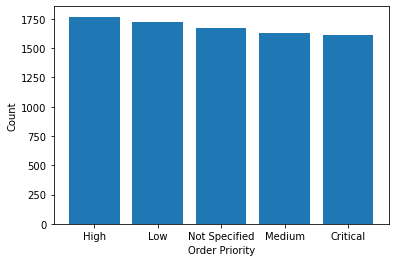

In [23]:
# F9: Function for categorical data analysis - includes value counts, and bar charts

def categorical_count(df,x):  # prints value_counts of categorical columns and also plots the bar chart against the count
    print(df[x].value_counts())
    
    aa=pd.DataFrame(df[x].value_counts())
    aa=aa.rename(columns={x:'COUNT'})
    aa[x]=aa.index
    plt.bar(aa[x],aa['COUNT'])
    plt.xlabel(x)
    plt.ylabel('Count')
    
def categorical_analysis(df,x,KPI,aggfunc):  # plots bar chart of KPI against a categorical column. For eg price against
    z=pd.pivot_table(df,index=x,values=KPI,aggfunc=aggfunc)  # product type
    z[x]=z.index
    plt.bar(z[x],z[KPI])
    plt.xlabel(x)
    plt.ylabel(KPI)
categorical_count(x,'Order Priority')

In [145]:
# F10: Function to change the type of any column (input col name and the type you want)

def to_numeric(df,columns):
    for i in columns:
        df[i]=pd.to_numeric(df[i])
    return df[i]
def to_str(df,columns):
    for i in columns:
        df[i]=df[i].astype(str)
    return df[i]
def to_datetime(df, columns):
    for i in columns:
        df[i]=pd.to_datetime(df[i])
    return df[i]
x

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09


In [20]:
# F11: Function to change the discretizations of a particular categorical column, e.g., rename the values, remove space between value names etc

def strip(df, column): # removes leading and trailing white spaces. Also removes excess white spaces between words
    import re
    df[column]=df[column].str.strip()
    df[column] = df[column].replace('\s+', ' ', regex=True)
    
def discretize(df,column,value1, value2): # replaces value1 with value2.
    df[column].replace(value1, value2, inplace=True) # value1 could be just one string value or list of string values
    return df[column]

In [150]:
# F12: Function for date analysis - extract year, month etc., subtract dates etc. (this function cannot be specified exactly so just add what you believe are the basic things)

# import datetime module for this function
def date_extract(df,column): 
    x=input('Would you like to extract year(Y),month(M),day(D),week(W),hour(H),minute(min) or second(S)?: ')
    if (x=='Y') or (x=='y'):
        return df[column].dt.year
    elif (x=='M') or (x=='m'):
        return df[column].dt.month
    elif (x=='D') or (x=='d'):
        return df[column].dt.day
    elif (x=='W') or (x=='w'):
        return df[column].dt.week
    elif (x=='H') or (x=='h'):
        return df[column].dt.hour
    elif (x=='min'):
        return df[column].dt.minute
    else:
        return df[column].dt.second

# import timedelta module for following function
def date_algebra(df, column, days, op):
    if op=='sum':
        return (df[column]+timedelta(days=days))
    elif op=='subtract':
        return (df[column]-timedelta(days=days))
    else:
        print('op should be either sum or subtract')
        
def duration(df, column1,column2): # return duration between two date columns in days
    d=df[column2]-df[column1]
    x=input('Would you like duration in years(Y),months(M),days(D),weeks(W),hours(H),minutes(min) or seconds(S)?: ')
    return d

Timedelta('168 days 00:00:00')

In [ ]:
# F13: function to make a deep copy of a dataframe

def df_copy(df):
    return df.copy(deep=True)

In [35]:
# F14: function to encode categorical into numerical (label, ordinal, or onehot)

def encode(df, column, encoder, ordinal_dict={}):
    if encoder=='label':
        label_encoder = preprocessing.LabelEncoder()
        x=label_encoder.fit_transform(df[column])
        return x
    elif (encoder=='one hot') or (encoder=='onehot'):
        prefix=input('What prefix do you want for your column?: ')
        x=pd.get_dummies(df, prefix=[prefix], columns=[column])
        return x
    elif encoder=='ordinal':
        x=df[column].map(ordinal_dict)
        return x
    else:
        print('Encoder argument should be either label, ordinal or one hot/onehot.')

0       2
1       1
2       1
3       1
4       4
       ..
8394    3
8395    3
8396    4
8397    4
8398    1
Name: Order Priority, Length: 8399, dtype: int64

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, log_loss, mean_absolute_error, mean_squared_error, r2_score

In [92]:
# F15: function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results:

def ml(df,label,algo,classification=True):
    P=df.drop([label],axis=1)
    L=df[label]
    scaler=StandardScaler()
    for i in P.columns:
        P[i]=scaler.fit_transform(P[[i]])
        dict_classifier={'Logistic Regression':LogisticRegression(),'Decision Tree':DecisionTreeClassifier(),'KNN':KNeighborsClassifier,
                'Naive Bayes':GaussianNB(),'Random Forrest':RandomForestClassifier(),'Gradient Boosting':GradientBoostingClassifier()}
        dict_regressor={'Linear Regression':LinearRegression(),'Decision Tree':DecisionTreeRegressor(),'KNN':KNeighborsRegressor,
                 'Random Forest':RandomForestRegressor(),'Gradient Boosting':GradientBoostingRegressor()}

    ts=input('What do you want your test size to be? ') #0.2
    x_train, x_test, y_train, y_test = train_test_split(P,L,test_size=ts,random state=42)
    if classification ==True:
        classifier=dict_classifier[algo]
        classifier.fit(x_train, y_train)
        y_pred=classifier.predict(x_test)
    
        print('Classification report: ')
        print(classification_report(y_test,y_pred))
        print('Accuracy(%): ')
        print(accuracy_score(y_test,y_pred)*100)
        print('Precision(%): ')
        print(precision_score(y_test,y_pred)*100)
        print('F1 score: ')
        print(f1_score(y_test,y_pred))
        print('Logistic loss: ')
        print(log_loss(y_test,y_pred))
    
        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
        sns.heatmap(confusion_matrix, annot=True)
        plt.show()
    
    else:
        regressor=dict_regressor[algo]
        regressor.fit(x_train, y_train)
        y_pred=regressor.predict(x_test)
        
        plt.scatter(y_test, y_pred, c = 'green') 
        plt.xlabel("True Value") 
        plt.ylabel("Predicted value") 
        plt.title("True value vs predicted value") 
        plt.show()
    
        print('Mean Absolute Error: ')
        print(mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error: ')
        print(mean_squared_error(y_test,y_pred))
        print('R squared error: ')
        print(r2_score(y_test,y_pred))

,Sales,Discount
0,-0.422429,-0.303930
1,2.328458,0.638840
2,-0.427163,-1.246700
3,0.889826,0.953097
4,-0.385403,0.953097
...,...,...
8394,-0.134410,0.010327
8395,-0.385878,-0.303930
8396,-0.265590,-0.618186
8397,-0.364324,-1.560956


Try the following with no missing values

In [121]:
# F16: Function to apply ANOVA and output results

def anova_test(df):
    x=input('Enter the KPI: ')
    y=input('Enter the categorical column: ')
    model = ols(x + ' ~ C(Q('+y+'))', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print ("\nAnova => "+x+" - "+y)
    display(anova_table)
anova_test(x)

Enter the KPI: Sales
Enter the categorical column: "Customer Segment"

Anova => Sales - "Customer Segment"


,sum_sq,df,F,PR(>F)
"C(Q(""Customer Segment""))",2.238326e+07,3.0,0.580425,0.627813
Residual,1.079136e+11,8395.0,NaN,NaN


In [ ]:
# F17: Function to generate correlation heatmaps

def corr_heatmap(df):
    corrmatrix = df.corr()
    f, axis = plt.subplots(figsize =(15, 10)) 
    sns.heatmap(corrmatrix, ax = axis, linewidths = 0.2)

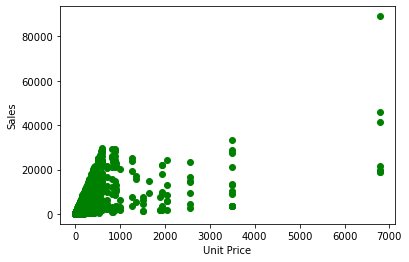

In [153]:
# F18: Function to generate scatter plot

def scatter(df, column1, column2):
    plt.scatter(df[column1], df[column2], c='green')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()
scatter(x,'Unit Price','Sales')